In [ ]:
%pip install python-louvain

In [ ]:
import numpy as np
import pandas as pd

los_speed_path = 'data/los_speed.csv'
los_adj_path = 'data/los_adj.csv'

los_speed = pd.read_csv(los_speed_path)
los_adj = pd.read_csv(los_adj_path, header=None)
los_adj = los_adj - np.eye(los_adj.shape[0])


In [6]:
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

G = nx.from_numpy_array(los_adj.values)

louvain_partition = community_louvain.best_partition(G)

spectral_clustering = SpectralClustering(n_clusters=5, affinity='precomputed', random_state=42)
spectral_labels = spectral_clustering.fit_predict(los_adj.values)

e:\Roman\GitHub\T-GCN-PyTorch\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


C:\Users\local\AppData\Local\Temp\ipykernel_20136\2476786482.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


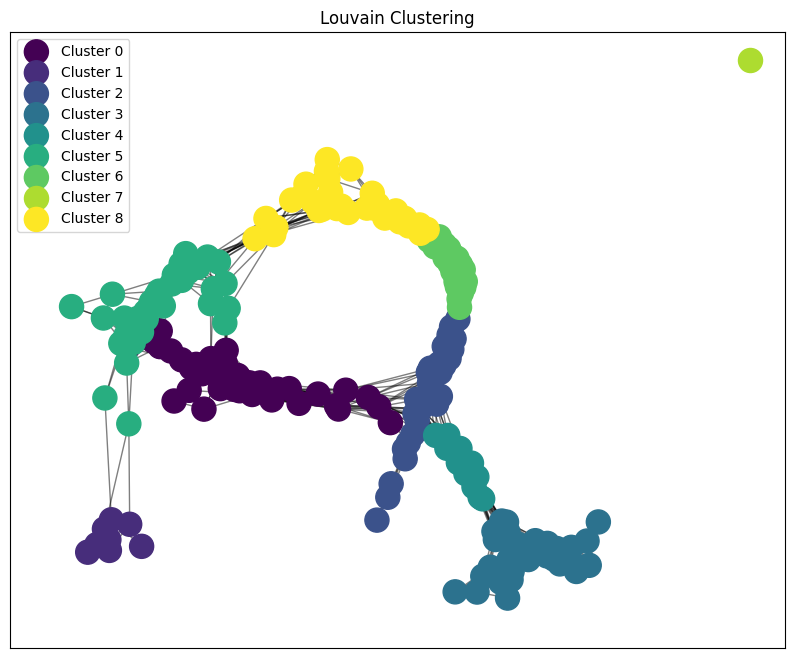

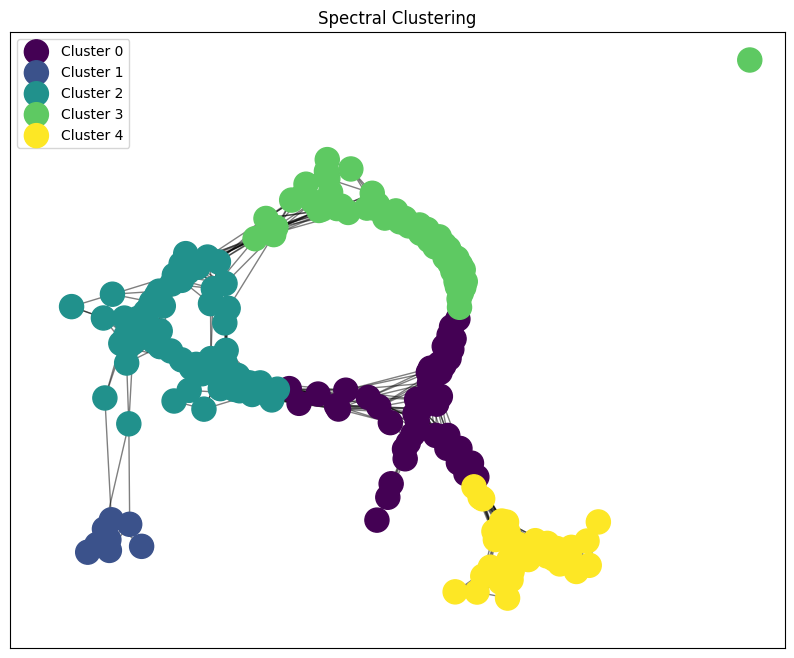

In [7]:
def plot_clusters(partition, title, pos):
    unique_clusters = np.unique(list(partition.values()))
    colors = plt.cm.get_cmap('viridis', len(unique_clusters))

    plt.figure(figsize=(10, 8))
    for i, cluster in enumerate(unique_clusters):
        node_list = [node for node, cluster_id in partition.items() if cluster_id == cluster]
        nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=[colors(i)]*len(node_list), label=f'Cluster {i}')

    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize Louvain clustering
pos = nx.spring_layout(G, seed=42)
plot_clusters(louvain_partition, "Louvain Clustering", pos)

# Visualize Spectral Clustering
spectral_partition = {i: spectral_labels[i] for i in range(len(spectral_labels))}
plot_clusters(spectral_partition, "Spectral Clustering", pos)

In [8]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

threshold = np.percentile(list(betweenness_centrality.values()), 90)
bottleneck_nodes = [node for node, centrality in betweenness_centrality.items() if centrality >= threshold]
non_bottleneck_nodes = [node for node in G.nodes if node not in bottleneck_nodes]

print(f"Bottleneck nodes: {bottleneck_nodes}")
print(f"Number of bottleneck nodes: {len(bottleneck_nodes)}")

Bottleneck nodes: [0, 13, 16, 42, 67, 71, 73, 75, 82, 110, 113, 117, 118, 125, 133, 137, 140, 141, 173, 190, 199]
Number of bottleneck nodes: 21


C:\Users\local\AppData\Local\Temp\ipykernel_20136\666161211.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_clusters))


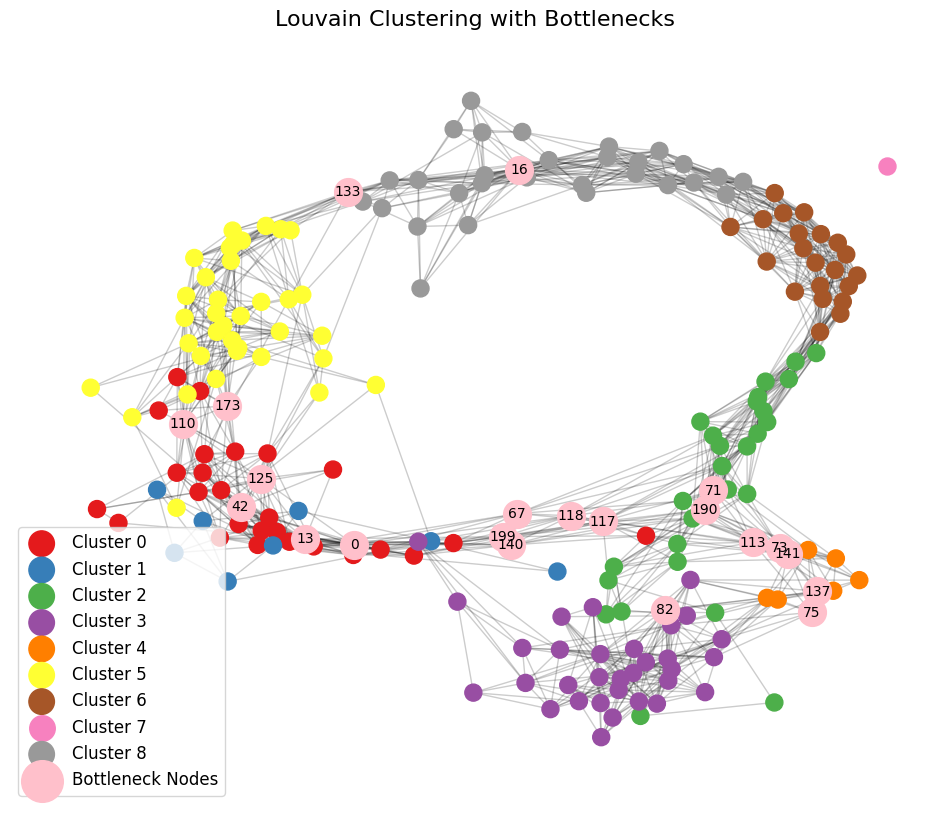

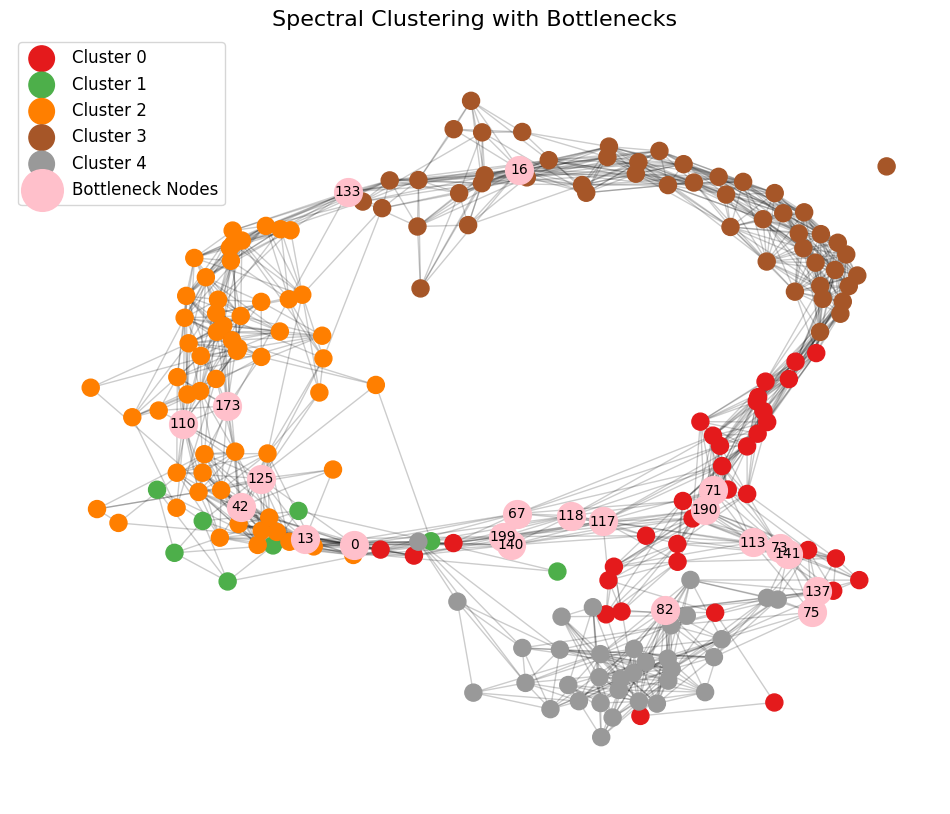

In [9]:
def plot_clusters(partition, title, bottleneck_nodes, G, k=0.2):
    # Уникальные кластеры
    unique_clusters = np.unique(list(partition.values()))
    colors = plt.cm.get_cmap('Set1', len(unique_clusters))

    # Определение позиций с использованием spring_layout с увеличенным расстоянием
    pos = nx.spring_layout(G, k=k, seed=42)  # Аргумент k контролирует расстояние между узлами

    plt.figure(figsize=(12, 10))

    for i, cluster in enumerate(unique_clusters):
        node_list = [node for node, cluster_id in partition.items() if cluster_id == cluster and node not in bottleneck_nodes]
        nx.draw_networkx_nodes(G, pos, nodelist=node_list,
                               node_color=[colors(i)]*len(node_list),
                               node_size=150, label=f'Cluster {i}')

    edges_no_selfloops = [(u, v) for u, v in G.edges() if u != v]
    nx.draw_networkx_edges(G, pos, edgelist=edges_no_selfloops, alpha=0.2, width=1.0)

    nx.draw_networkx_nodes(G, pos, nodelist=bottleneck_nodes,
                           node_color='pink', node_size=400, label='Bottleneck Nodes')

    bottleneck_labels = {node: str(node) for node in bottleneck_nodes}
    nx.draw_networkx_labels(G, pos, labels=bottleneck_labels, font_size=10, font_color="black")

    plt.title(title, fontsize=16)
    plt.legend(fontsize=12, markerscale=1.5)
    plt.axis('off')
    plt.show()



plot_clusters(louvain_partition, "Louvain Clustering with Bottlenecks", bottleneck_nodes, G)
plot_clusters(spectral_partition, "Spectral Clustering with Bottlenecks", bottleneck_nodes, G)

In [9]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)


threshold = np.percentile(list(betweenness_centrality.values()), 90)
bottleneck_nodes = [node for node, centrality in betweenness_centrality.items() if centrality >= threshold]
non_bottleneck_nodes = [node for node in G.nodes if node not in bottleneck_nodes]

print(f"Bottleneck nodes: {bottleneck_nodes}")
print(f"Number of bottleneck nodes: {len(bottleneck_nodes)}")

Bottleneck nodes: [0, 13, 16, 42, 67, 71, 73, 75, 82, 110, 113, 117, 118, 125, 133, 137, 140, 141, 173, 190, 199]
Number of bottleneck nodes: 21


In [10]:
closeness_centrality = nx.closeness_centrality(G)

threshold = np.percentile(list(closeness_centrality.values()), 90)
top_closeness_nodes = [node for node, centrality in closeness_centrality.items() if centrality >= threshold]
non_top_closeness_nodes = [node for node in G.nodes if node not in top_closeness_nodes]

print(f"Top 10% Closeness Centrality nodes: {top_closeness_nodes}")
print(f"Number of top closeness centrality nodes: {len(top_closeness_nodes)}")

Top 10% Closeness Centrality nodes: [0, 13, 36, 40, 58, 67, 72, 73, 102, 114, 116, 117, 118, 119, 125, 140, 145, 175, 176, 190, 199]
Number of top closeness centrality nodes: 21


In [11]:
overlapping_nodes = set(bottleneck_nodes).intersection(set(top_closeness_nodes))

for node in overlapping_nodes:
    print(f"Node {node} - Betweenness: {betweenness_centrality[node]}, Closeness: {closeness_centrality[node]}")

Node 0 - Betweenness: 0.12994072508803595, Closeness: 0.2602102734297603
Node 67 - Betweenness: 0.060233786448744095, Closeness: 0.2553252244917798
Node 199 - Betweenness: 0.051370305520479005, Closeness: 0.253107759762943
Node 73 - Betweenness: 0.1020808924786066, Closeness: 0.2434425469796325
Node 140 - Betweenness: 0.051370305520479005, Closeness: 0.253107759762943
Node 13 - Betweenness: 0.07271683246706553, Closeness: 0.24578898116738798
Node 117 - Betweenness: 0.0613459706779908, Closeness: 0.2543701426046534
Node 118 - Betweenness: 0.10662998771511574, Closeness: 0.2618804292284108
Node 125 - Betweenness: 0.06885252908107893, Closeness: 0.25092848015858804
Node 190 - Betweenness: 0.06538198723450458, Closeness: 0.25628750548860807


In [12]:
bottleneck_speeds = los_speed.iloc[:, bottleneck_nodes]

bottleneck_speeds_head = bottleneck_speeds.head()
bottleneck_speeds_head

773869     773906  771667     773927     773880     717491     717493  \
0  64.375000  68.500000   37.75  62.000000  64.500000  66.250000  59.125000   
1  62.666667  65.444444   39.00  64.444444  66.777778  62.333333  61.888889   
2  64.000000  65.250000   35.25  65.250000  66.625000  59.875000  60.500000   
3  61.777778  65.277778   39.50  66.500000  67.638889  58.250000  61.777778   
4  59.555556  65.305556   43.75  67.750000  68.652778  56.625000  63.055556   

      717498     769430     717099  ...     717571     717570     718090  \
0  52.250000  64.250000  67.375000  ...  69.250000  65.375000  50.125000   
1  54.666667  66.000000  63.555556  ...  69.555556  62.555556  55.222222   
2  54.375000  64.500000  65.250000  ...  66.000000  64.750000  56.500000   
3  52.472222  59.444444  66.611111  ...  66.666667  65.833333  53.444444   
4  50.569444  54.388889  67.972222  ...  67.333333  66.916667  50.388889   

      716953     769358     718496     769346     717585     764858     774204  
0  61.750000  63.875000  57.625000  64.625000  63.750000  67.750000  64.500000  
1  63.333333  63.555556  69.000000  67.444444  65.777778  67.666667  66.666667  
2  61.625000  64.125000  57.125000  68.125000  66.750000  68.750000  56.500000  
3  62.527778  62.416667  60.861111  67.638889  64.277778  67.722222  60.444444  
4  63.430556  60.708333  64.597222  67.152778  61.805556  66.694444  64.388889  

[5 rows x 21 columns]

In [13]:
average_speed_all_nodes = los_speed.mean(axis=1)

average_speed_bottleneck_nodes = bottleneck_speeds.mean(axis=1)

comparison_df = pd.DataFrame({
    'Average Speed (All Nodes)': average_speed_all_nodes,
    'Average Speed (Bottleneck Nodes)': average_speed_bottleneck_nodes
})

comparison_df['dif'] = np.abs(comparison_df['Average Speed (All Nodes)'] - comparison_df['Average Speed (Bottleneck Nodes)'])
comparison_df.sort_values("dif", ascending=False).head(20)

Average Speed (All Nodes)  Average Speed (Bottleneck Nodes)        dif
1665                  52.406609                         41.386243  11.020365
1670                  56.471582                         45.468166  11.003416
1669                  55.221890                         44.233422  10.988468
1666                  52.924229                         42.281463  10.642767
1667                  53.898564                         43.357143  10.541421
1664                  51.733689                         41.337302  10.396388
1671                  56.937203                         46.715476  10.221726
1902                  56.762164                         46.547619  10.214545
1905                  54.374622                         44.226190  10.148432
1668                  54.378275                         44.246410  10.131865
1899                  57.391736                         47.279762  10.111975
1904                  55.297792                         45.588435   9.709356
475                   49.306088                         39.660714   9.645374
1906                  54.324009                         44.801871   9.522138
498                   44.514847                         35.117347   9.397500
1908                  54.507345                         45.208333   9.299012
1958                  48.939836                         39.796825   9.143011
476                   49.162540                         40.232804   8.929735
1663                  51.465494                         42.542328   8.923165
1946                  42.667585                         34.043651   8.623934

In [14]:
overall_average_speed_all_nodes = average_speed_all_nodes.mean()
overall_average_speed_bottleneck_nodes = average_speed_bottleneck_nodes.mean()

overall_comparison = {
    'Overall Average Speed (All Nodes)': overall_average_speed_all_nodes,
    'Overall Average Speed (Bottleneck Nodes)': overall_average_speed_bottleneck_nodes
}

overall_comparison

{'Overall Average Speed (All Nodes)': 58.89144250908075,
 'Overall Average Speed (Bottleneck Nodes)': 57.83902505390582}

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

los_speed_path = 'data/los_speed.csv'
los_adj_path = 'data/los_adj.csv'

los_speed = pd.read_csv(los_speed_path)
los_adj = pd.read_csv(los_adj_path, header=None)

G = nx.from_numpy_array(los_adj.values)

betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

threshold = np.percentile(list(betweenness_centrality.values()), 90)
bottleneck_nodes = [node for node, centrality in betweenness_centrality.items() if centrality >= threshold]
non_bottleneck_nodes = [node for node in G.nodes if node not in bottleneck_nodes]

print(f"Bottleneck nodes: {bottleneck_nodes}")
print(f"Number of bottleneck nodes: {len(bottleneck_nodes)}")

Bottleneck nodes: [0, 13, 16, 42, 67, 71, 73, 75, 82, 110, 113, 117, 118, 125, 133, 137, 140, 141, 173, 190, 199]
Number of bottleneck nodes: 21


In [16]:
node_id_mapping = {index: node_id for index, node_id in enumerate(los_speed.columns)}
bottleneck_node_ids = [node_id_mapping[node] for node in bottleneck_nodes if node in node_id_mapping]


bottleneck_speeds = los_speed[bottleneck_node_ids]
non_bottleneck_nodes = [col for col in los_speed.columns if col not in bottleneck_node_ids]

daily_speed_dfs = [los_speed.iloc[i*time_steps_per_day:(i+1)*time_steps_per_day] for i in range(7)]


In [17]:
def plot_node_speed_selected(data, node, title):
    plt.figure(figsize=(12, 6))

    time_labels = pd.date_range("00:00", "23:55", freq="5min")


    plt.plot(time_labels, data[node])


    plt.title(title, fontsize=16)
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Speed', fontsize=12)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

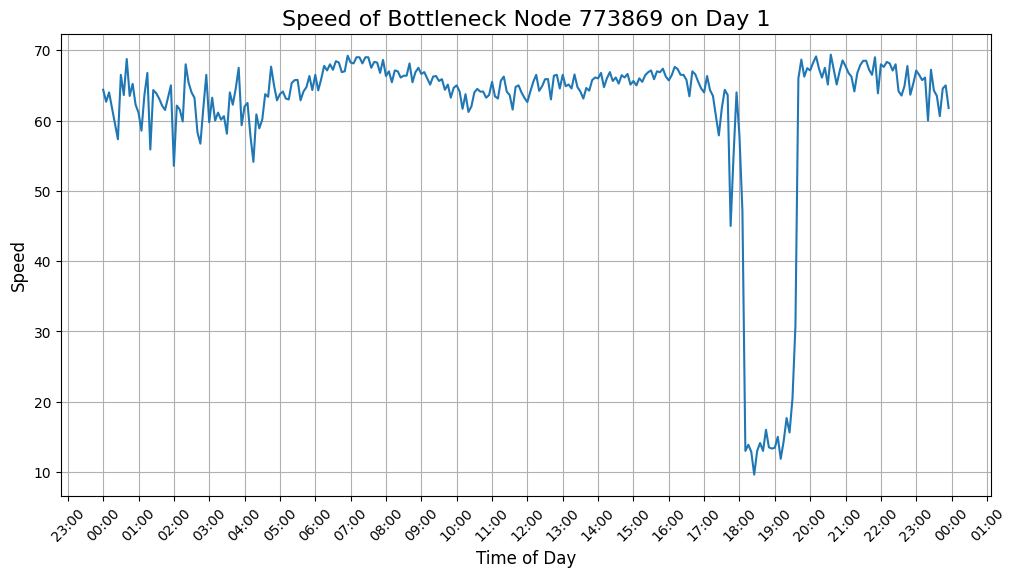

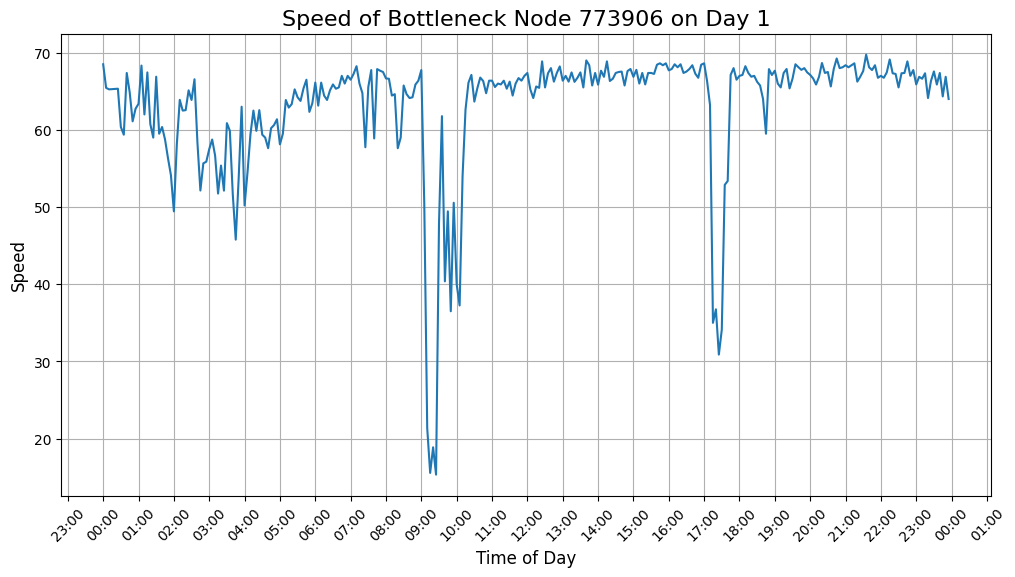

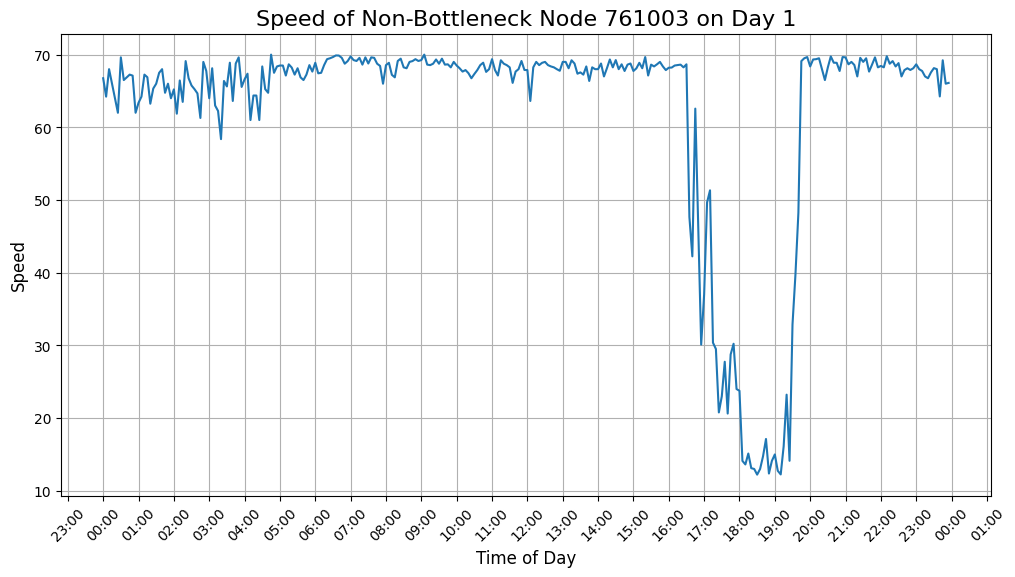

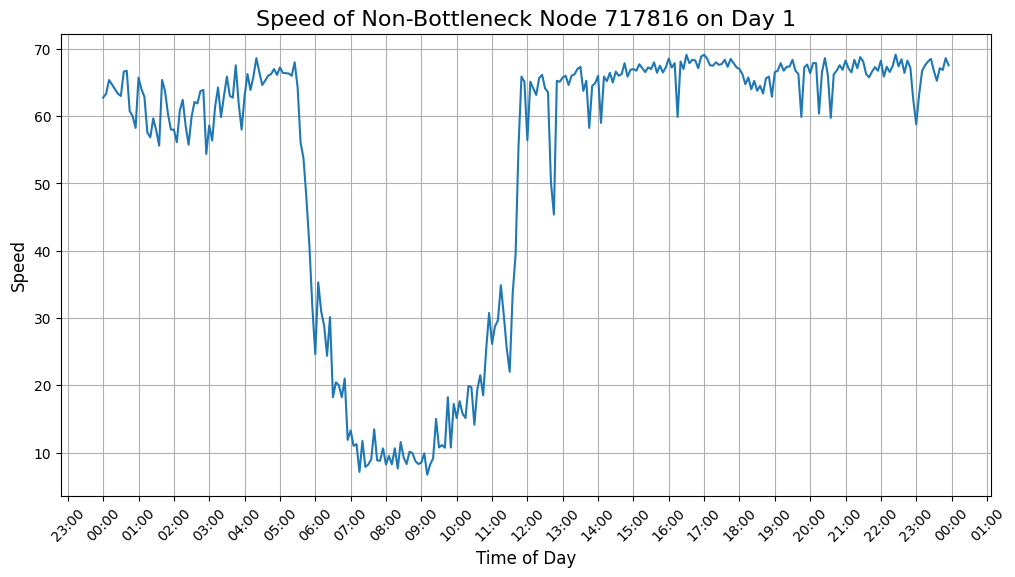

In [ ]:
for node in bottleneck_speeds.columns[:2]:
    plot_node_speed_selected(daily_speed_dfs[0], node, f'Speed of Bottleneck Node {node} on Day 1')


random_non_bottleneck_nodes = np.random.choice(non_bottleneck_nodes, 2, replace=False)


for node in random_non_bottleneck_nodes:
    plot_node_speed_selected(daily_speed_dfs[0], node, f'Speed of Non-Bottleneck Node {node} on Day 1')


In [19]:
average_speed_all_nodes = los_speed.mean(axis=1)

average_speed_daily_dfs = [average_speed_all_nodes.iloc[i*time_steps_per_day:(i+1)*time_steps_per_day] for i in range(7)]

average_speed_daily_dfs[0].head()

0    62.957212
1    62.987990
2    62.510323
3    62.477360
4    62.444397
dtype: float64

In [20]:
def plot_average_vs_bottleneck(day_index, bottleneck_index = 0):
    bottleneck_node = bottleneck_speeds.columns[bottleneck_index]
    plt.figure(figsize=(12, 6))

    time_labels = pd.date_range("00:00", "23:55", freq="5min")


    plt.plot(time_labels, average_speed_daily_dfs[day_index], label='Average Speed (All Nodes)', color='blue')


    plt.plot(time_labels, daily_speed_dfs[day_index][bottleneck_node], label=f'Speed of Bottleneck Node {bottleneck_node}', color='red')

    plt.title(f'Comparison of Average Speed (All Nodes) and Bottleneck Node {bottleneck_node} on Day {day_index + 1}', fontsize=16)
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Speed', fontsize=12)


    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

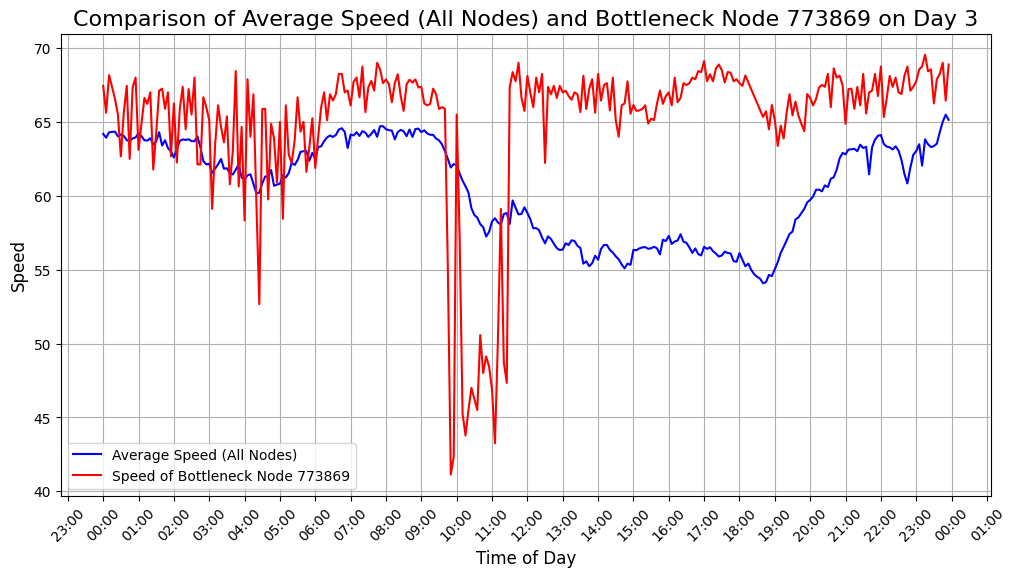

In [21]:
plot_average_vs_bottleneck(2)

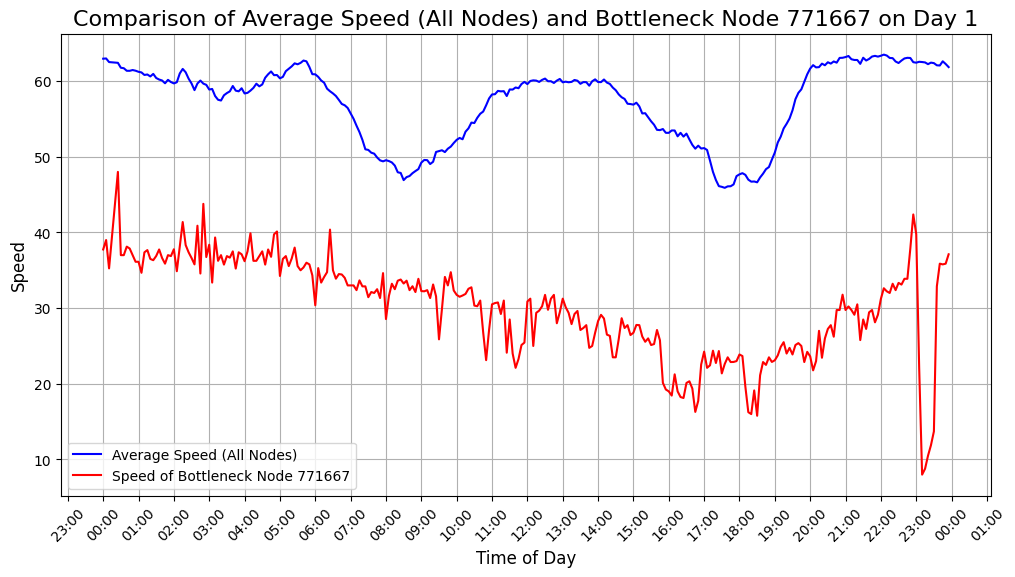

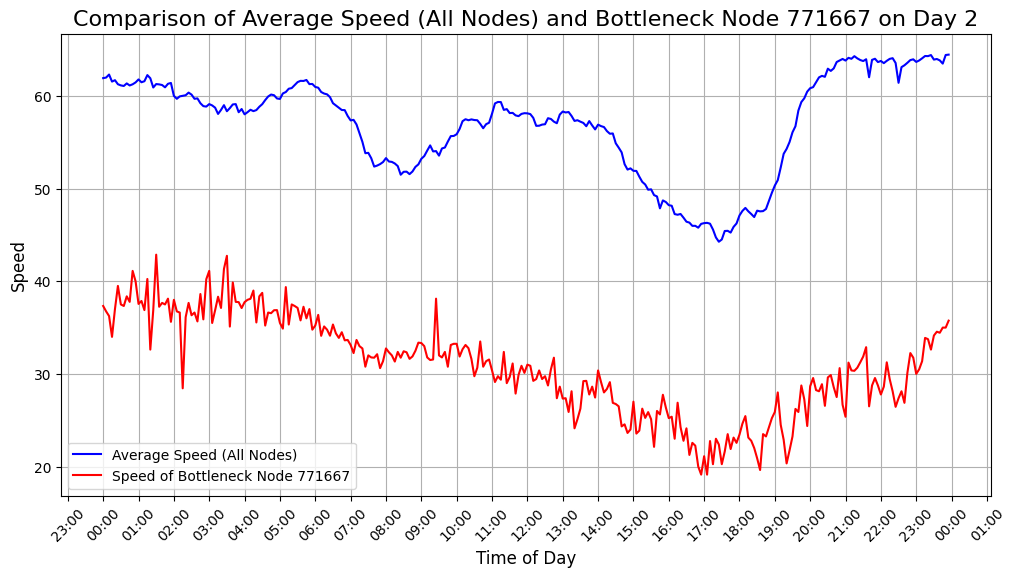

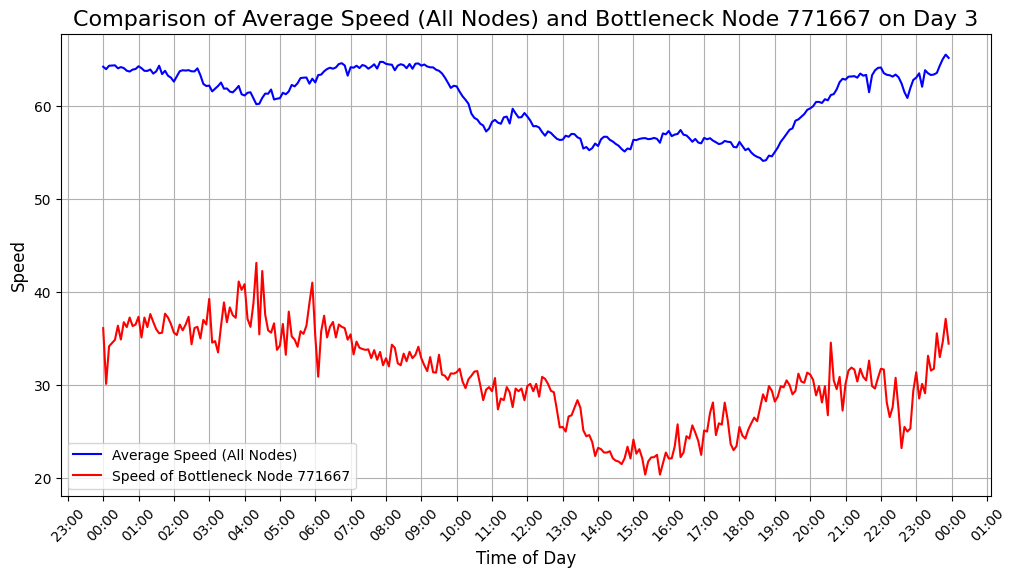

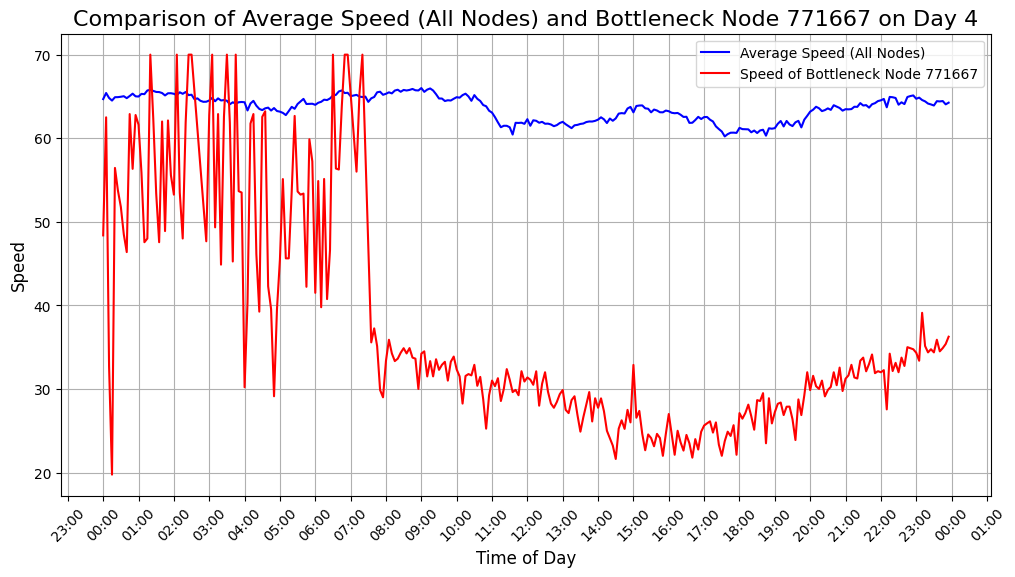

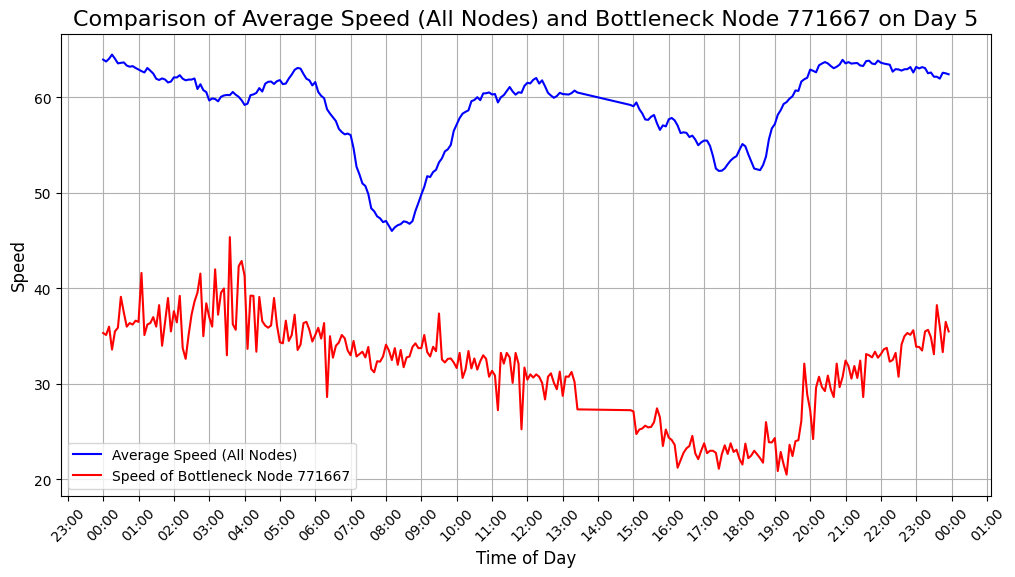

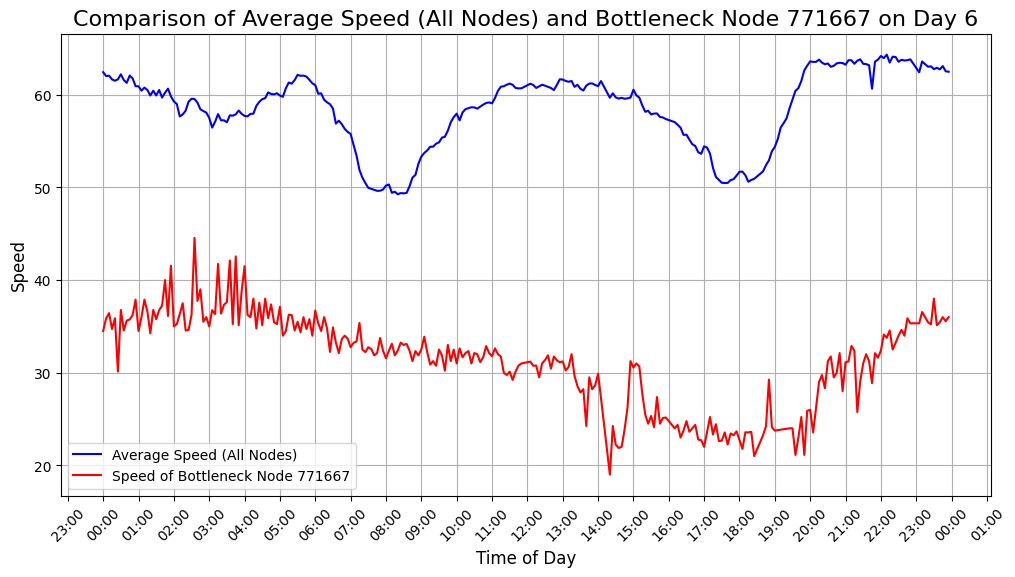

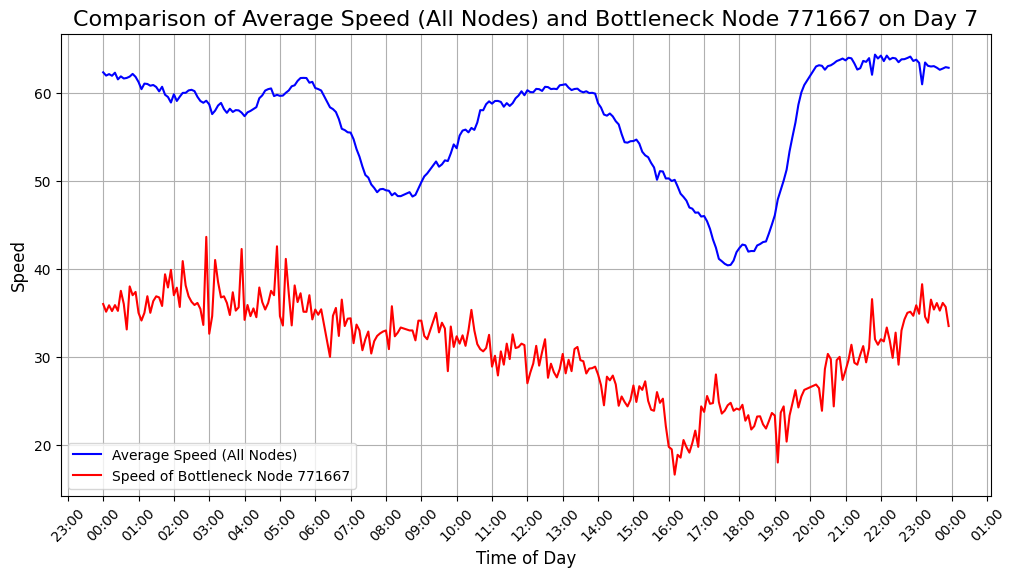

In [24]:
for i in range(7):
  plot_average_vs_bottleneck(i, 2)

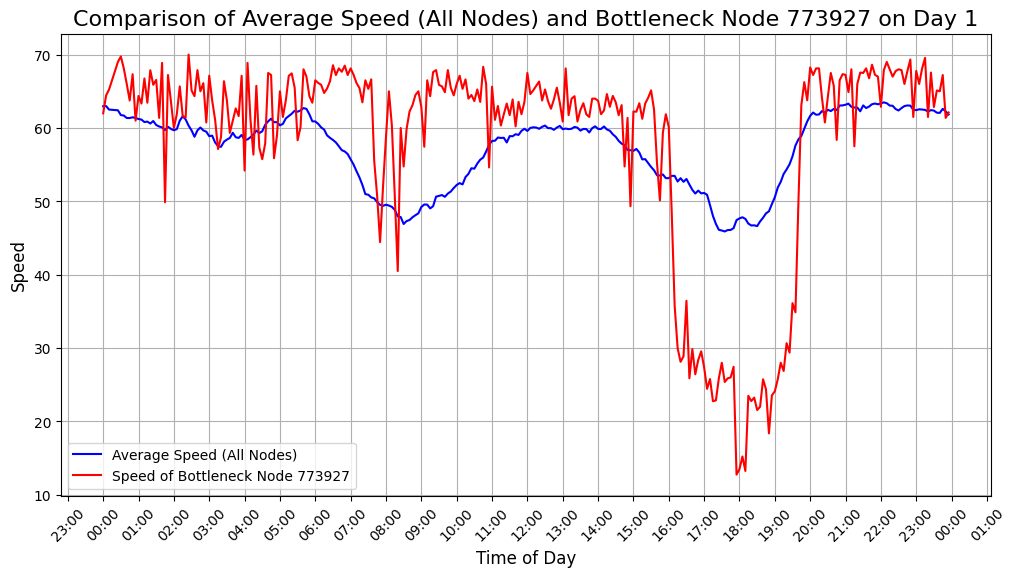

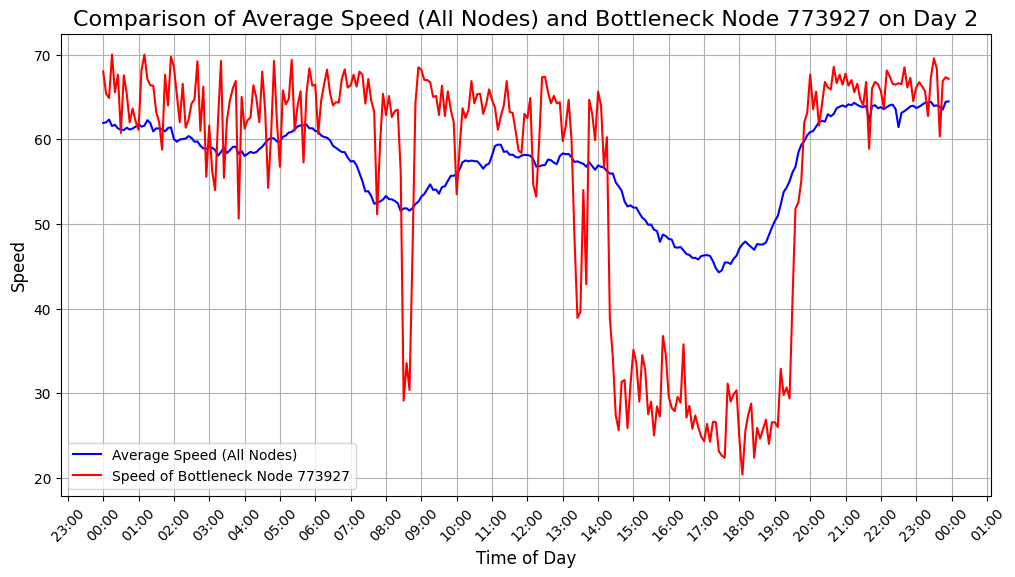

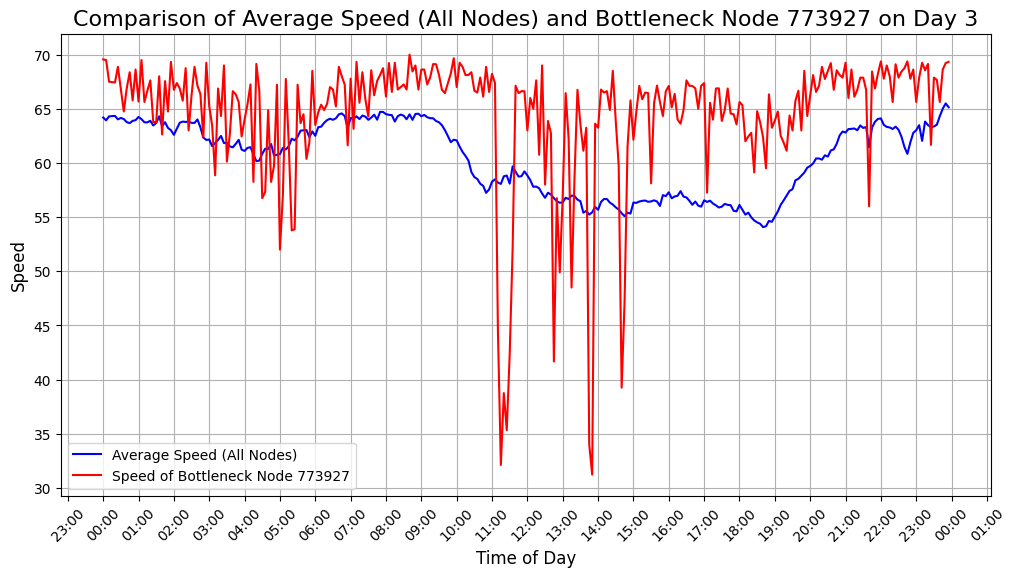

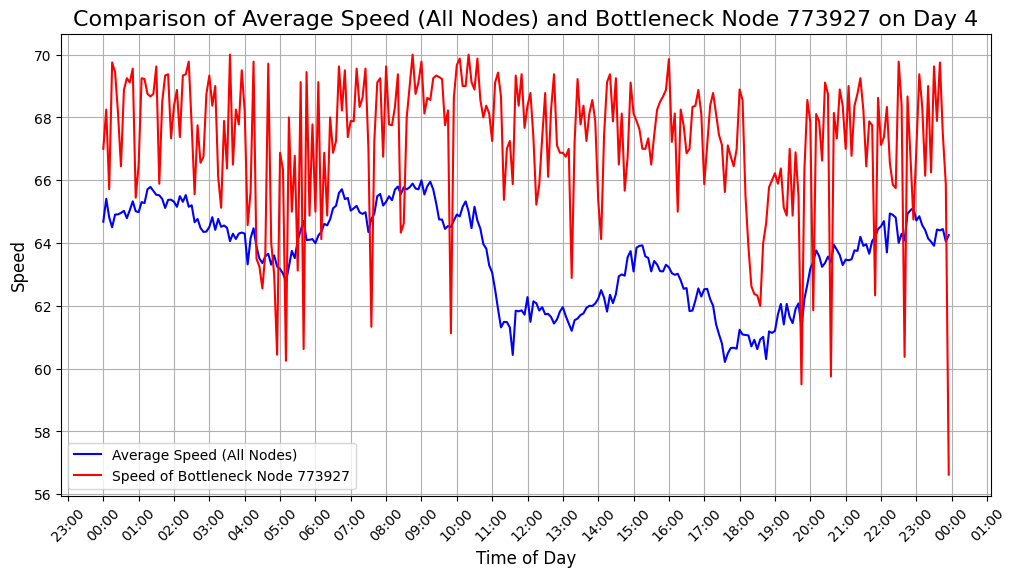

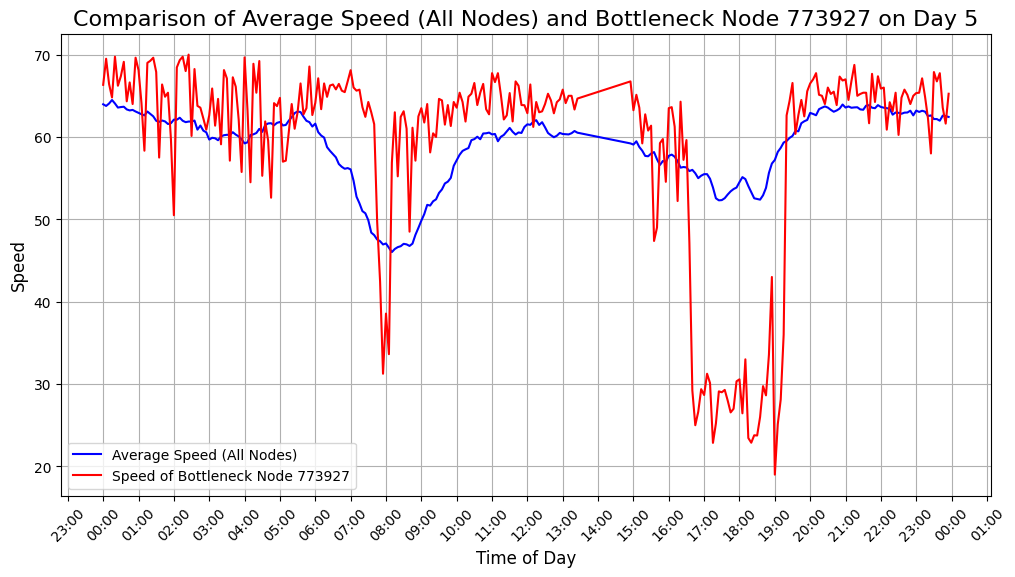

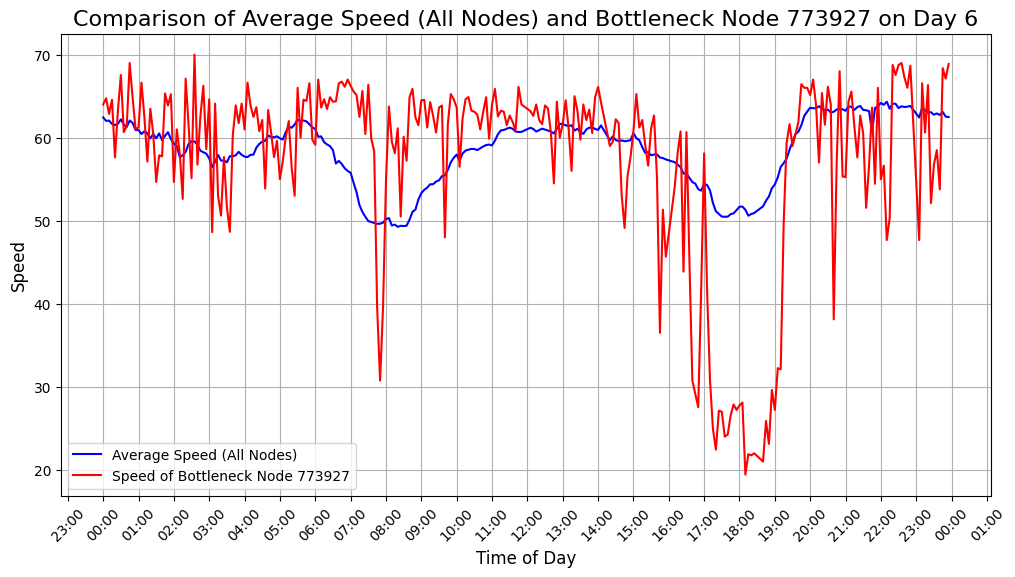

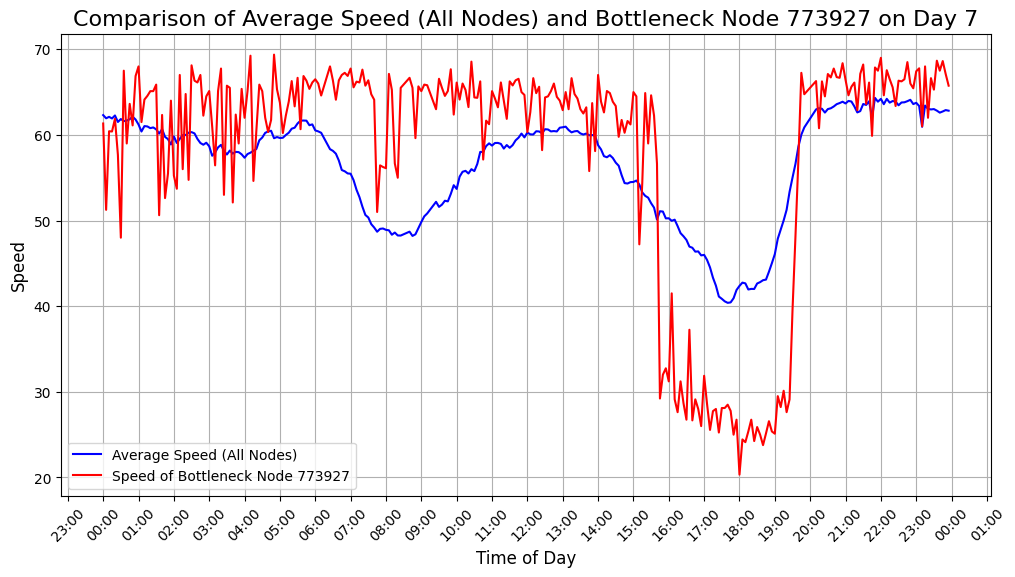

In [25]:
for i in range(7):
  plot_average_vs_bottleneck(i, 3)

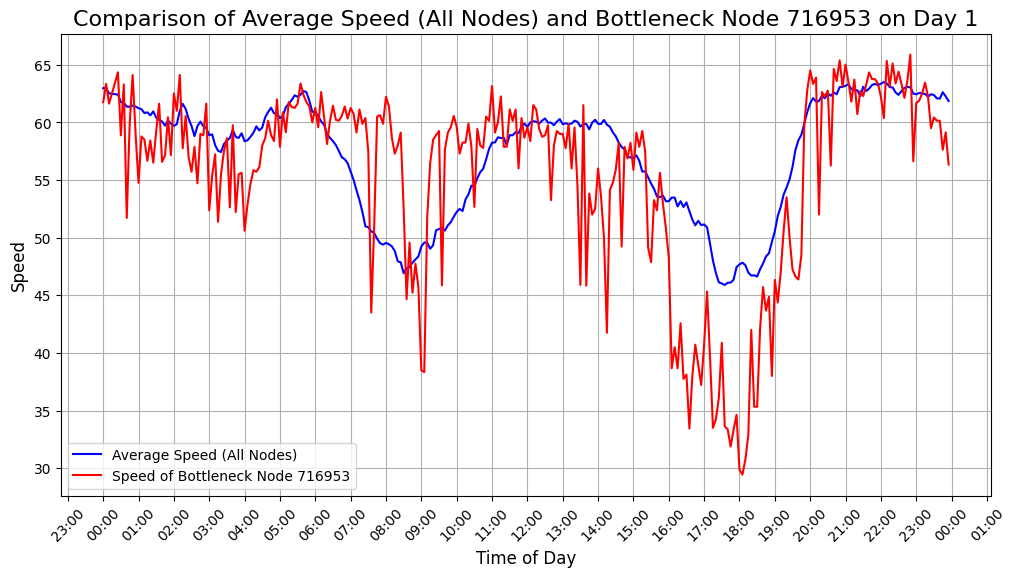

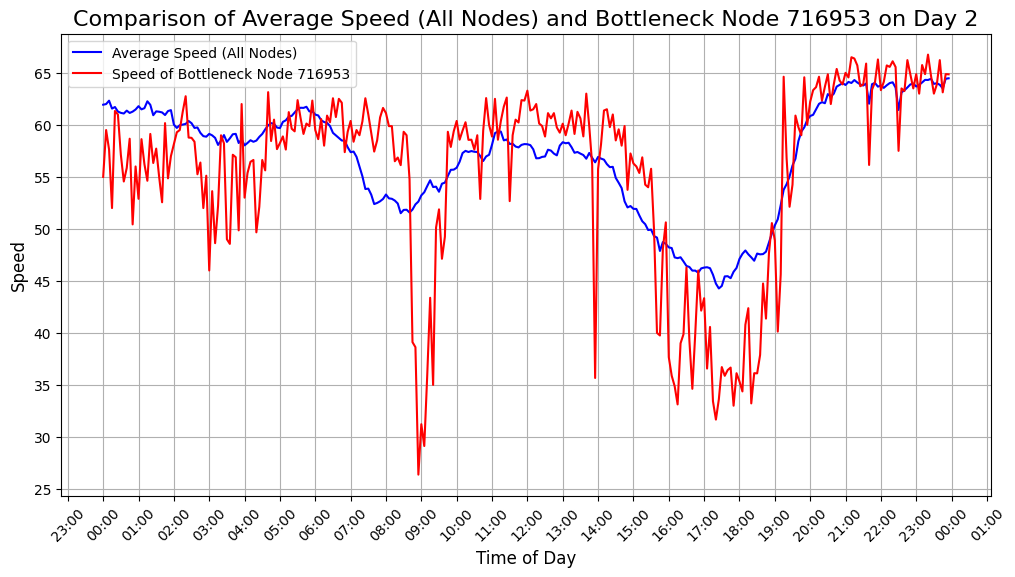

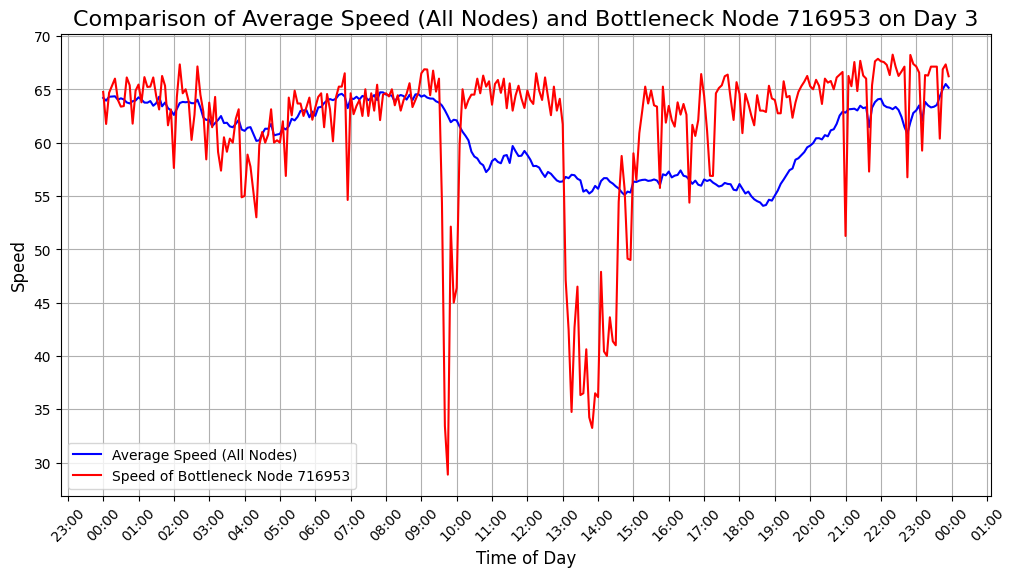

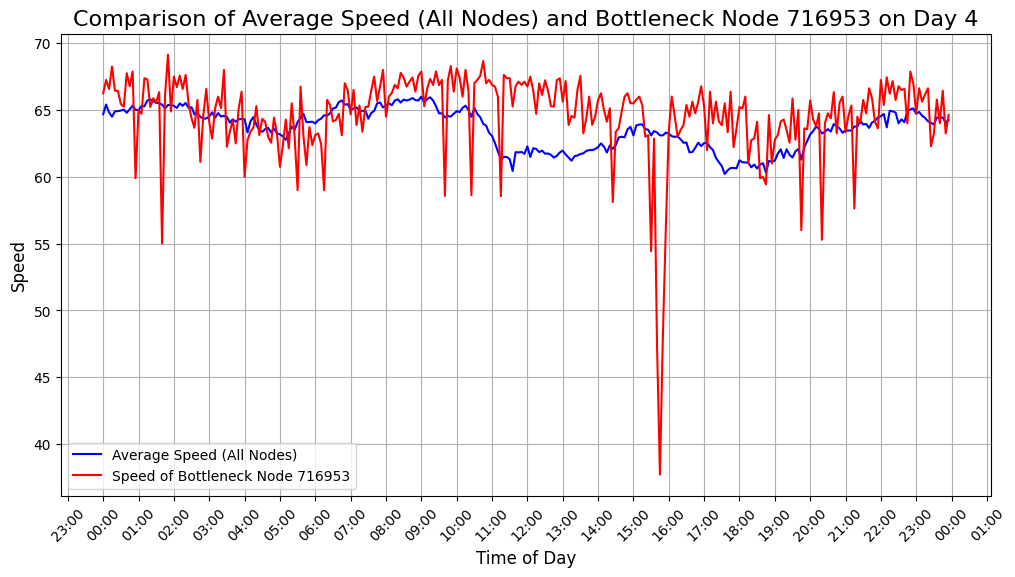

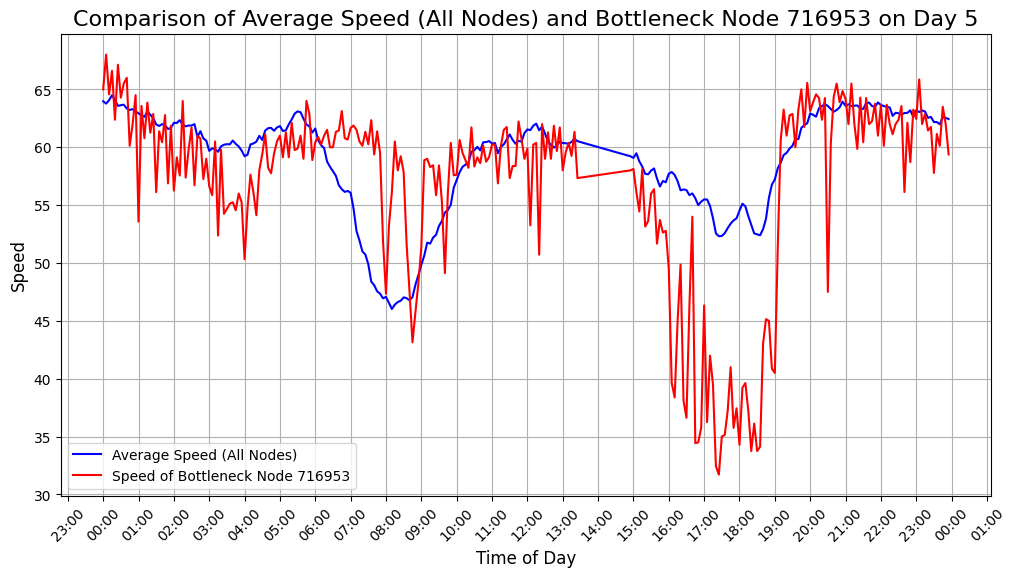

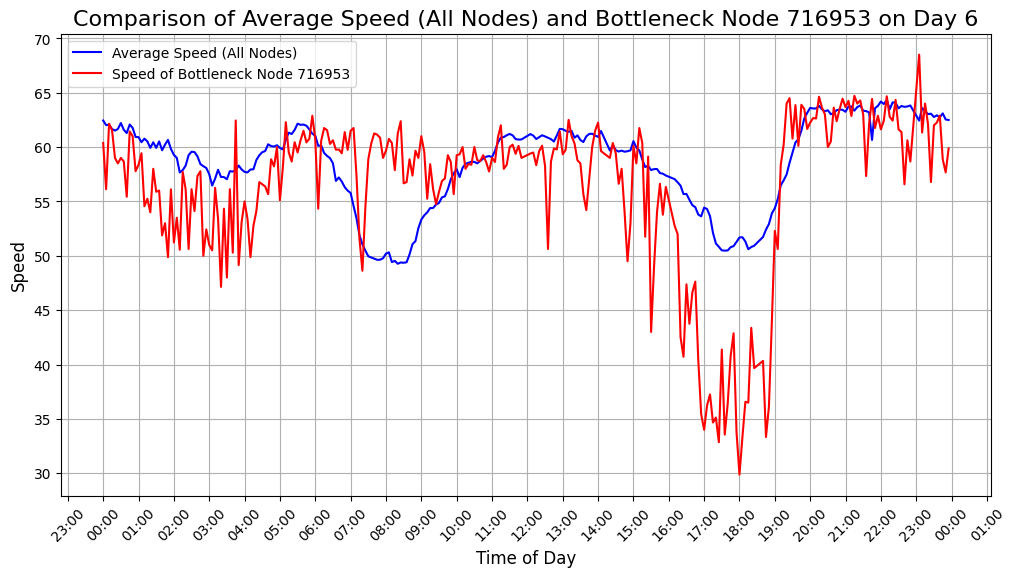

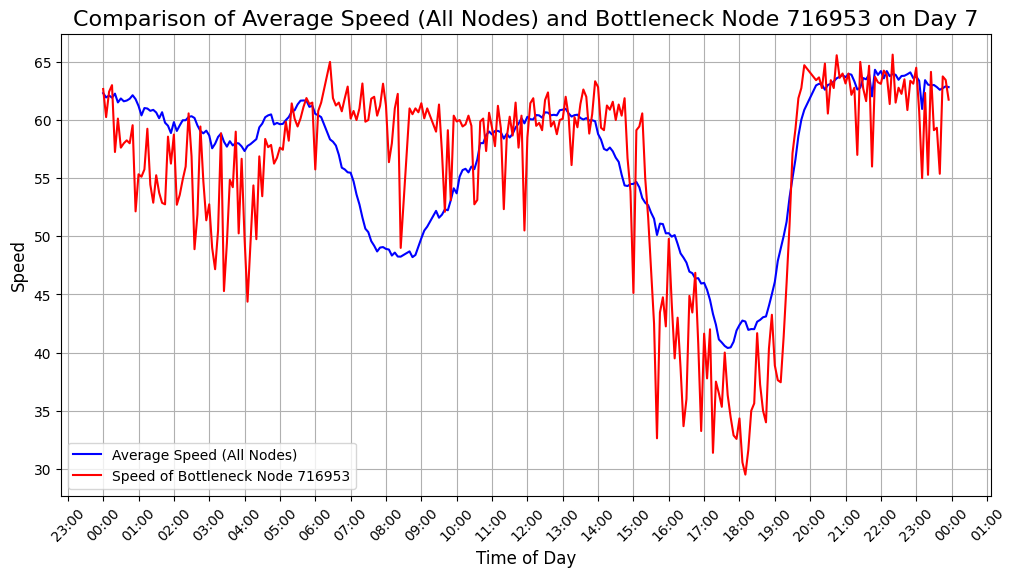

In [27]:
for i in range(7):
  plot_average_vs_bottleneck(i, 14)